---

<h1 style="text-align: center;font-size: 40px;">Video Games Sales Analysis And Visualization</h1>

---

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)

import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

#缺失值可视化
import missingno as msno 

from sklearn.preprocessing import StandardScaler
from scipy import stats

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data = pd.read_csv('vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
#删除2015年之后的数据，统计不完整
drop_row_index = data[data['Year'] > 2015].index
data = data.drop(drop_row_index)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16250 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16250 non-null  int64  
 1   Name          16250 non-null  object 
 2   Platform      16250 non-null  object 
 3   Year          15979 non-null  float64
 4   Genre         16250 non-null  object 
 5   Publisher     16194 non-null  object 
 6   NA_Sales      16250 non-null  float64
 7   EU_Sales      16250 non-null  float64
 8   JP_Sales      16250 non-null  float64
 9   Other_Sales   16250 non-null  float64
 10  Global_Sales  16250 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Their fields and data types are:**

   * Rank - Ranking of overall sales, integer
   
   * Name - The games name

   * Platform - Platform of the games release (i.e. PC,PS4, etc.), object

   * Year - Year of the game's release, float

   * Genre - Genre of the game ,object

   * Publisher - Publisher of the game, object

   * NA_Sales - Sales in North America (in millions), float

   * EU_Sales - Sales in Europe (in millions), float

   * JP_Sales - Sales in Japan (in millions), float

   * Other_Sales - Sales in the rest of the world (in millions), float

   * Global_Sales - Total worldwide sales, float



In [5]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16250.000000,15979.000000,16250.000000,16250.000000,16250.000000,16250.000000,16250.000000
mean,8233.153785,2006.197071,0.268924,0.148146,0.078601,0.048614,0.544564
std,4775.382512,5.714810,0.824467,0.509035,0.312196,0.190271,1.569213
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4095.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8213.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12340.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2015.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
data.describe(include=['object', 'bool'])

,Name,Platform,Genre,Publisher
count,16250,16250,16250,16194
unique,11296,31,12,566
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2162,3196,1331


In [7]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        56
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

# 1. 哪种类型的游戏被制作的数量最多？

In [8]:
data['Genre'].value_counts()

Action          3196
Sports          2308
Misc            1721
Role-Playing    1446
Shooter         1278
Adventure       1252
Racing          1229
Platform         876
Simulation       857
Fighting         834
Strategy         671
Puzzle           582
Name: Genre, dtype: int64

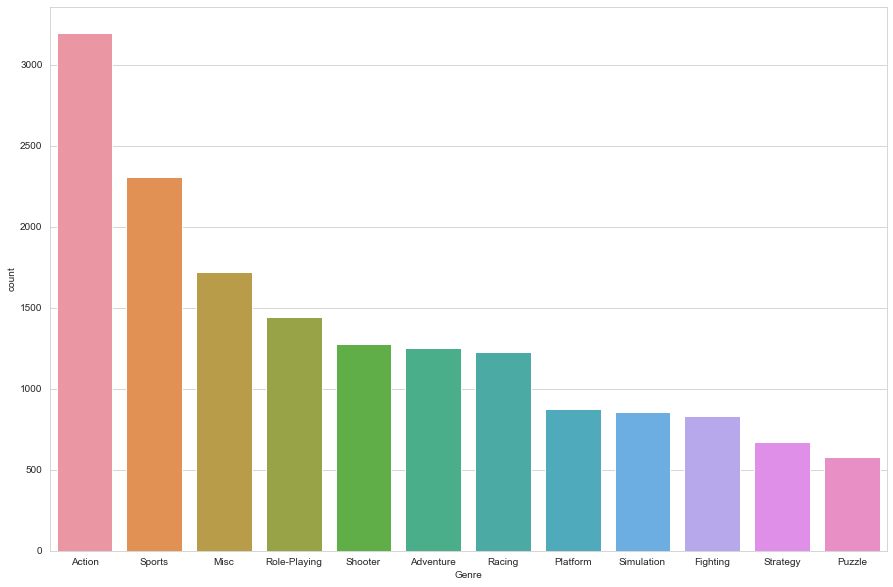

In [9]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=data, order = data['Genre'].value_counts().index)

### 答案：“动作类”和“运动类”

# 2. 哪一年发行游戏最多？

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 <a list of 36 Text major ticklabel objects>)

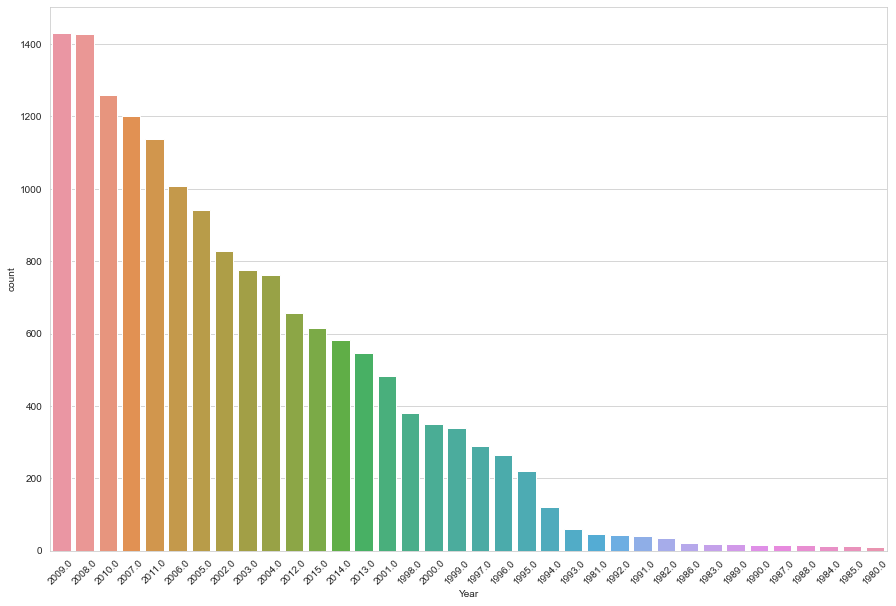

In [10]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=data, order = data.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=45)

In [11]:
sum(data.Year == 2009)

1431

### 答案：2009年发行了最多数量游戏共计1431款

# 3. 发行游戏最多的前五年发行游戏类别数量

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

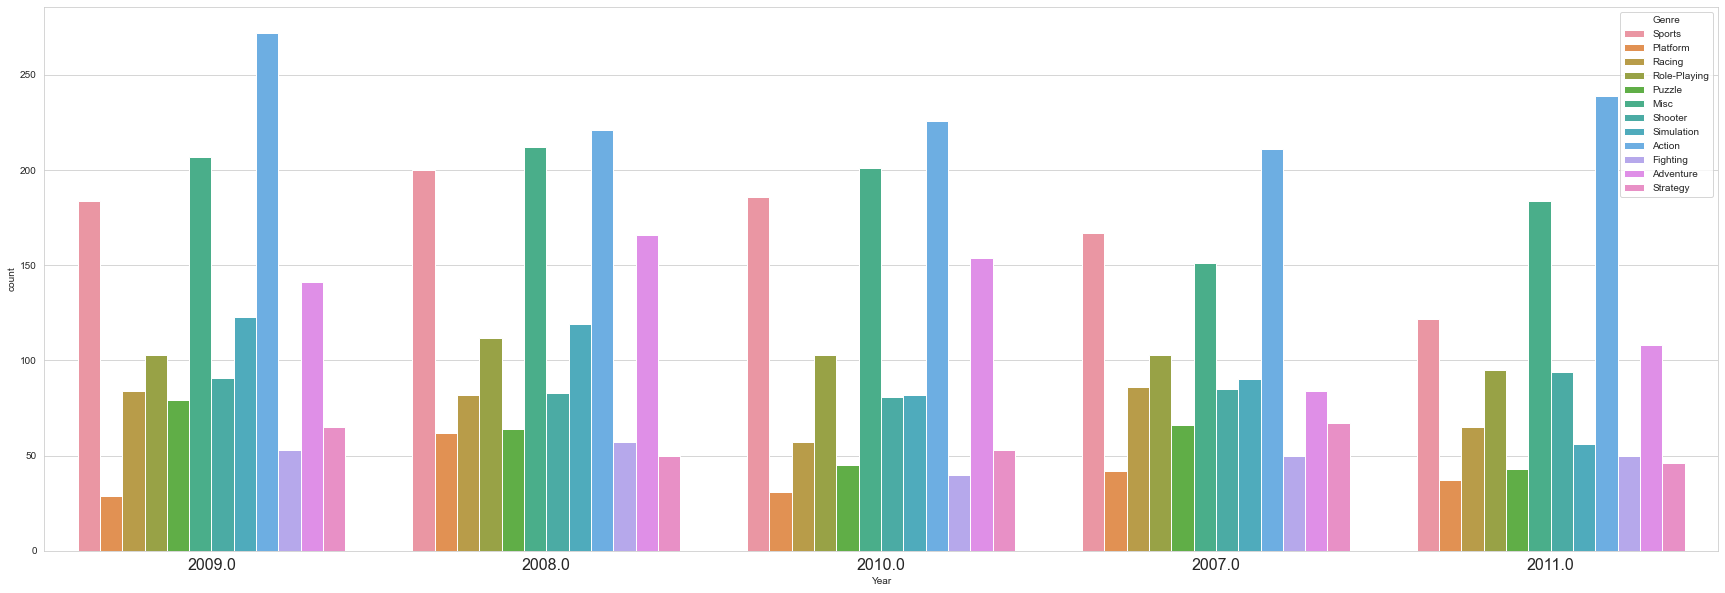

In [12]:
plt.figure(figsize=(30, 10))
sns.countplot(x="Year", data=data, hue='Genre', order=data.Year.value_counts().iloc[:5].index)
plt.xticks(size=16)

# 4. 哪一年有全世界最高的销量?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 <a list of 36 Text major ticklabel objects>)

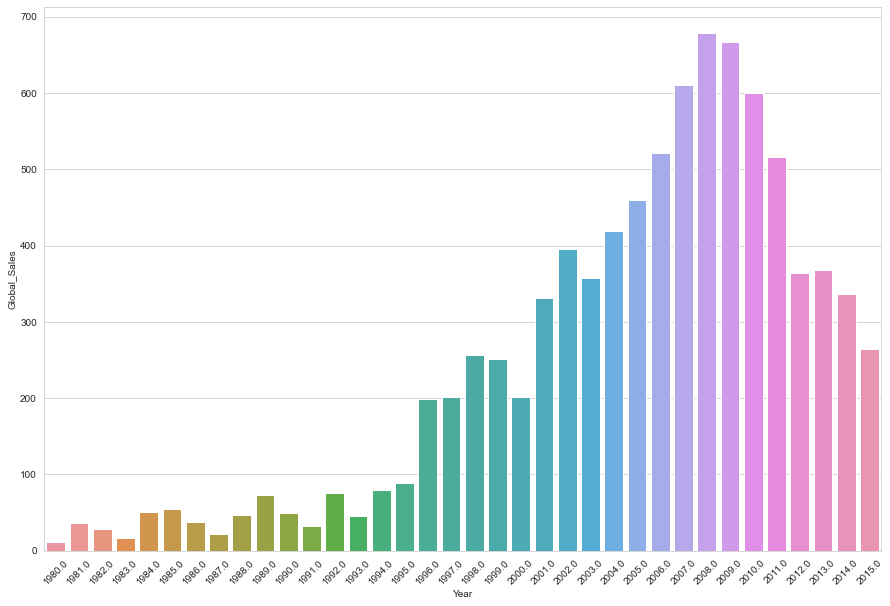

In [13]:
data_year = data.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="Global_Sales", data=data_year)
plt.xticks(rotation=45)

In [14]:
data_year.Global_Sales.max(0)

678.8999999999952

### 答案：2008年销量最多为678.90

# 5. 哪种类型的游戏在一年中发行最多？

In [15]:
#按Year、Genre分完组后找到各自size返回Series
#size column为索引，需要reset_index(name='count')取名，reset_index中drop=False时会生成一行索引形成新df
year_max_df = data.groupby(['Year', 'Genre']).size().reset_index(name='count')

#根据新df重新按Year分组取出count(每年各类的数量)中的最大值
#再判断每一年中哪一类是最大值，返回T/F
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']

#DataFrame[T/F Series]返回索引为T的数据构成的新DF  并将原索引删除重设索引
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
#保留一年中多个发行最多的多个种类中最后出现的种类
year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last',inplace = True)

In [16]:
genre = year_max_genre['Genre'].values

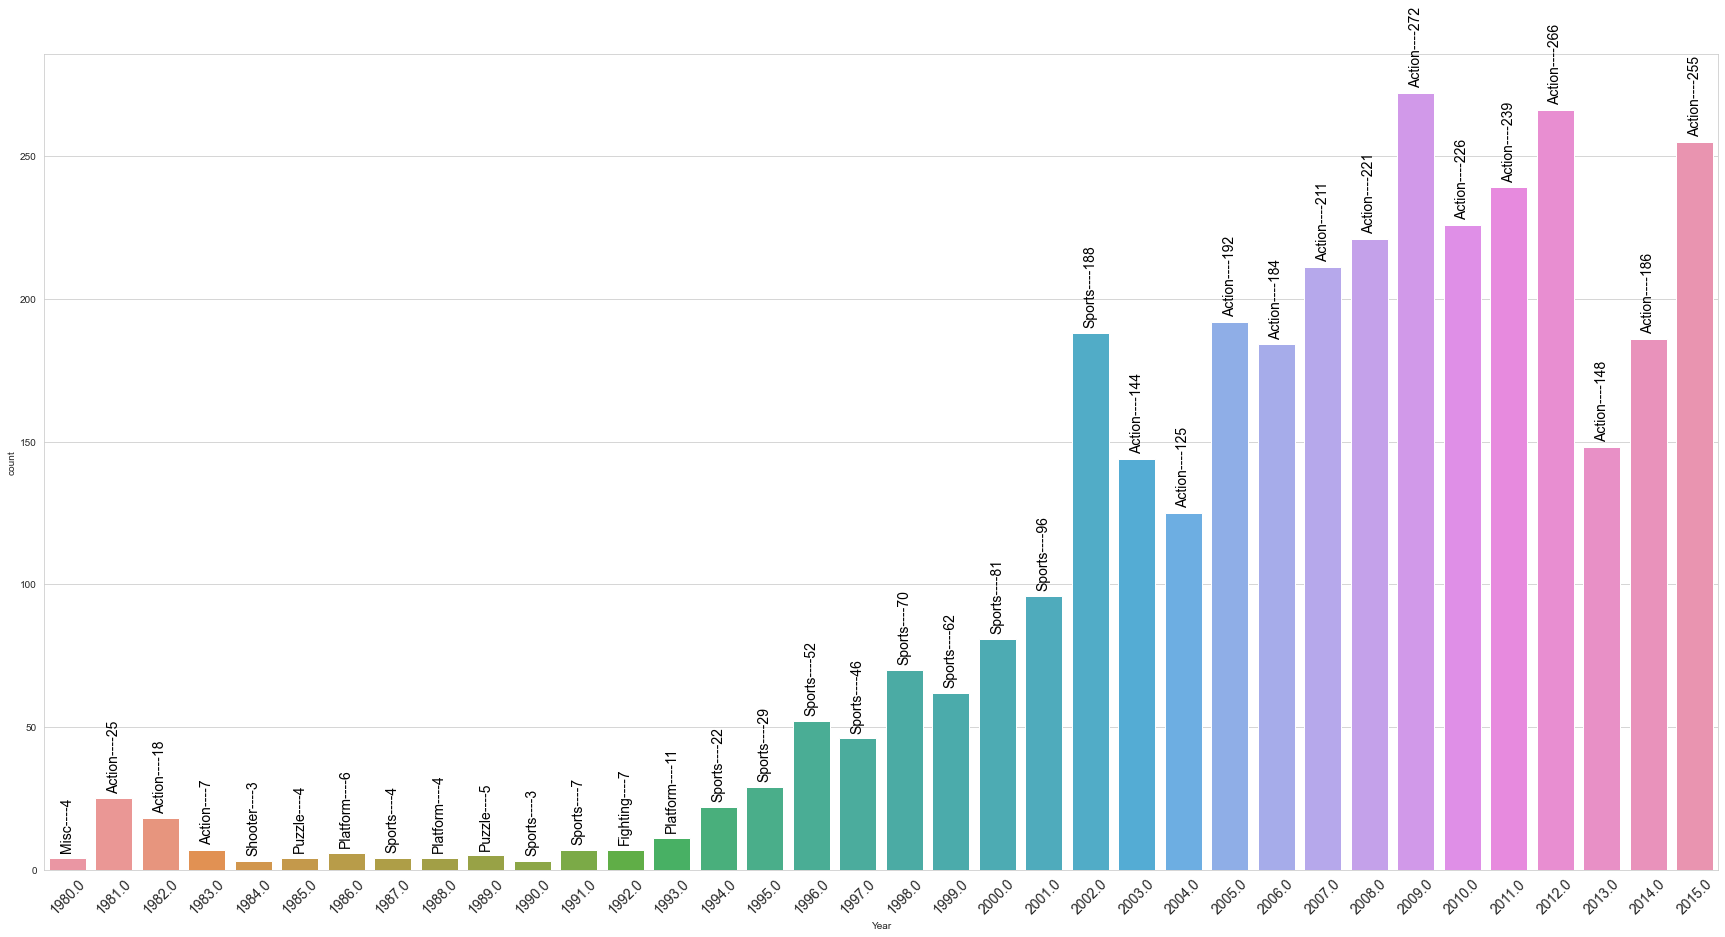

In [17]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='count', data=year_max_genre)
index = 0
#以数据作为循环参数在图形上加字
for value in year_max_genre['count'].values:
    g.text(index, value + 3 , str(genre[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1
plt.xticks(rotation=45,size = 14)
plt.show()

### 答案：2009年Action类发行数量最多共计272款

# 6. 哪种类型的游戏卖得最多?

In [18]:
year_sale_dx = data.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)
#year_sale_max

In [19]:
genre = year_sale_max['Genre']

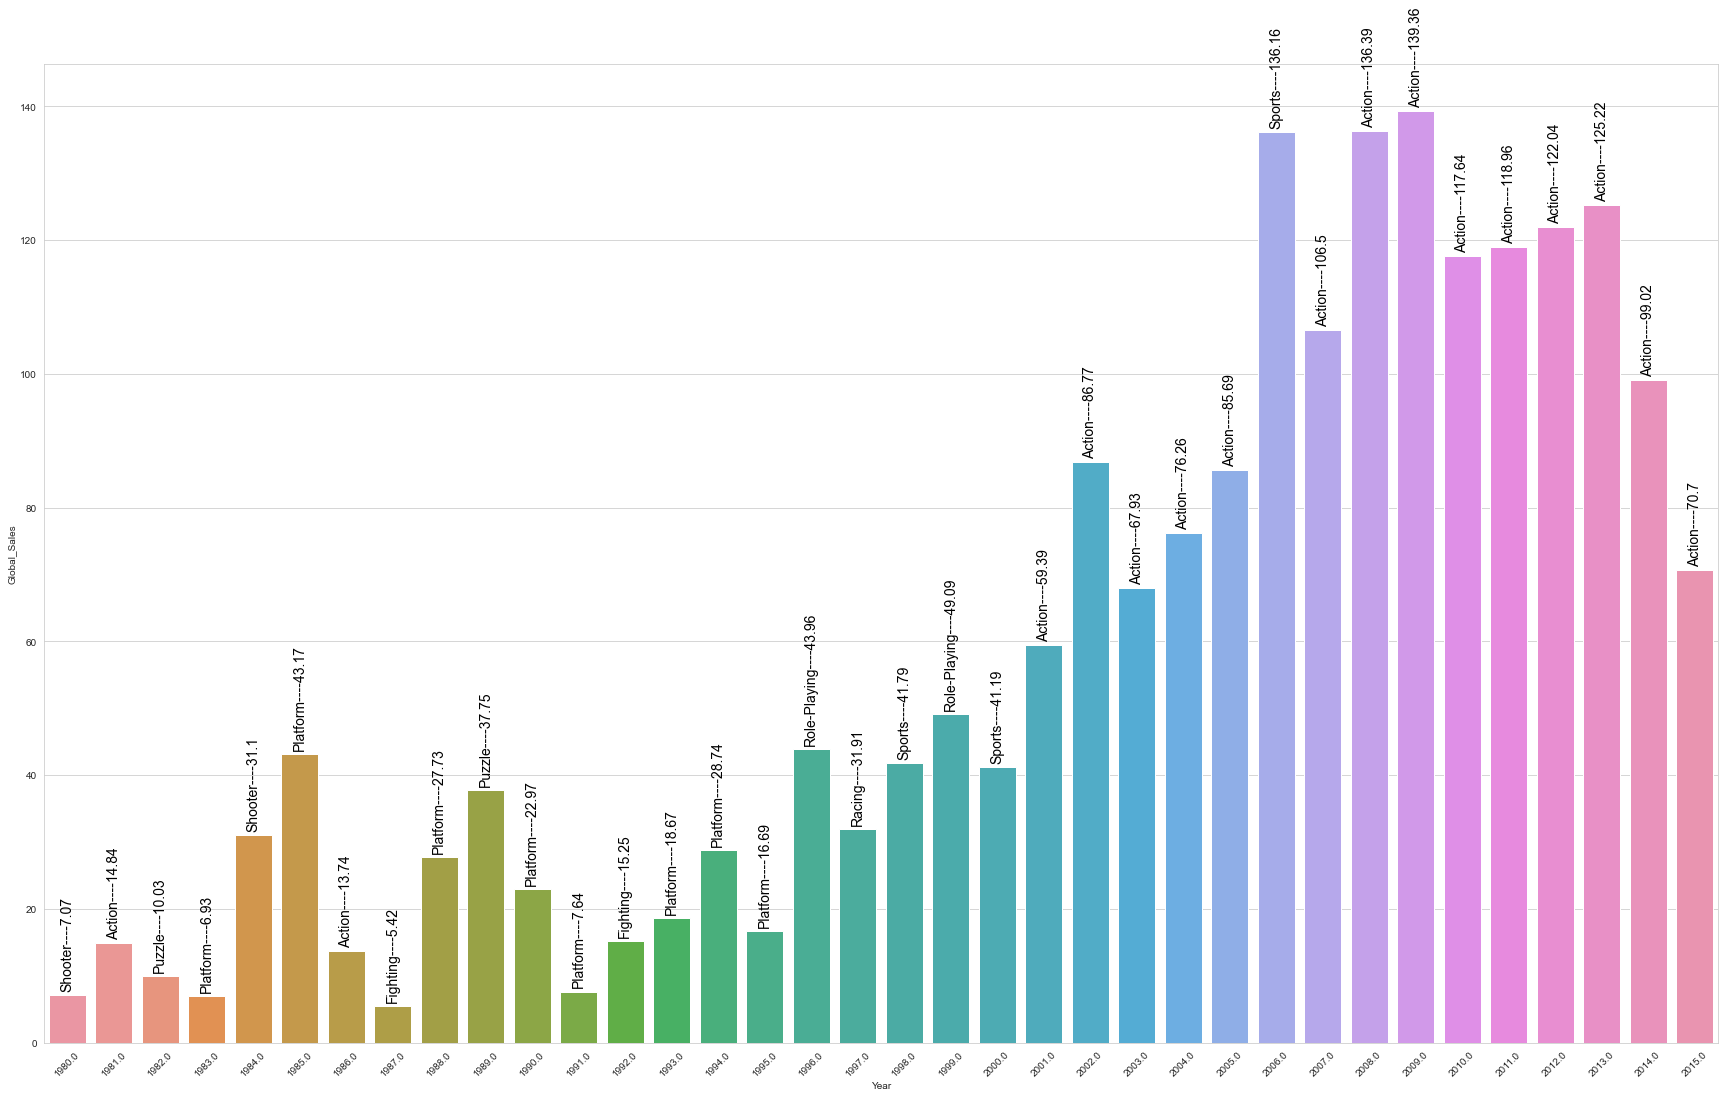

In [20]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + '----' +str(round(value, 2))), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=45)
plt.show()

### 答案：2009年动作类游戏卖出了最多数量为139.36


# 7. 哪种游戏在全球范围内销售额最高？

In [21]:
data_genre = data.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)
# data_genre

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

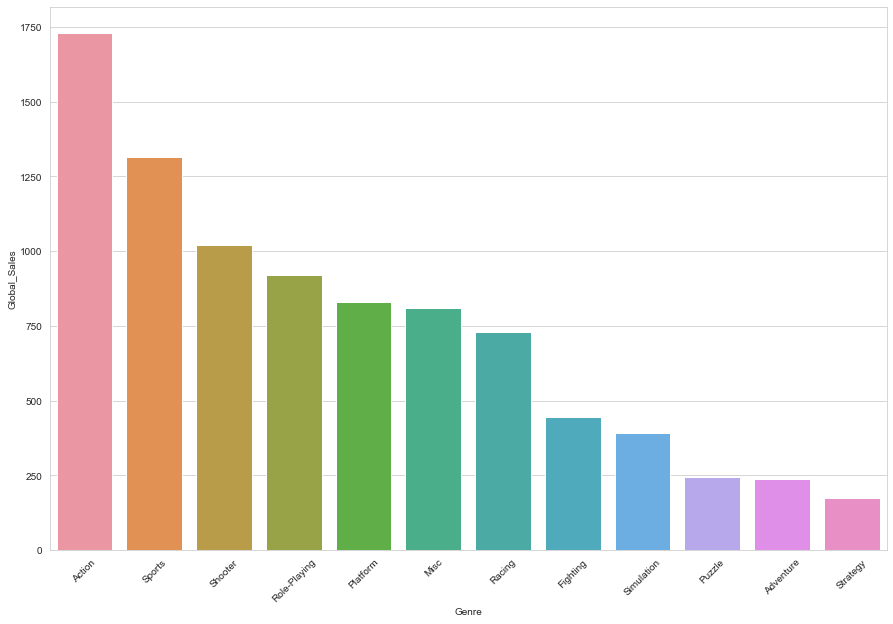

In [22]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
plt.xticks(rotation=45)

### 答案：动作类游戏销售额最高，其次是运动类

# 8. 在全球范围内哪个平台有最高销售额

In [23]:
data_platform = data.groupby(by=['Platform'])['Global_Sales'].sum()
#给series加一行index形成一个DF
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)
#data_platform

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

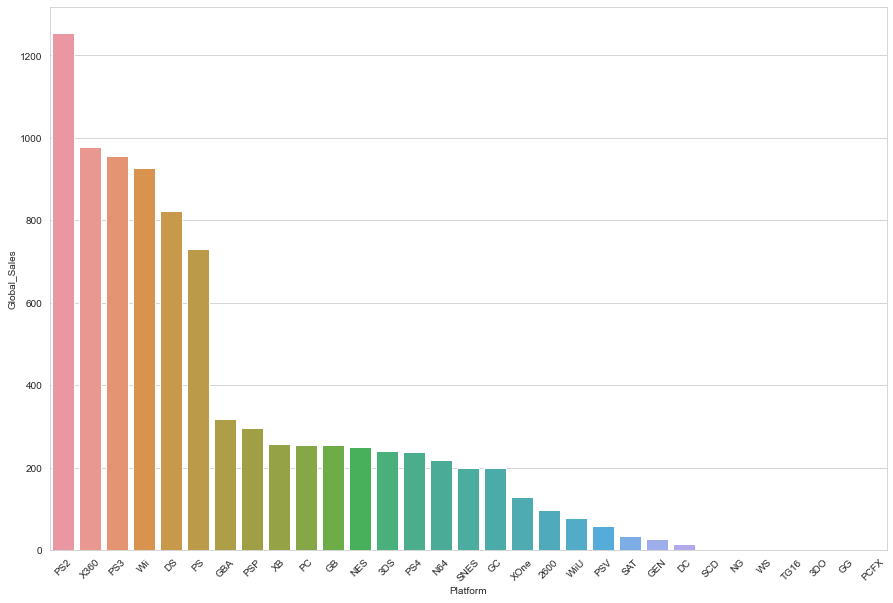

In [24]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=data_platform)
plt.xticks(rotation=45)

### 答案：PS2拥有最高销售额

# 9. 在全球范围内哪一个独立游戏拥有最高的销售额？

In [25]:
top_game_sale = data[['Name', 'Year', 'Genre', 'Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)
top_game_sale = top_game_sale.head()

In [26]:
name = top_game_sale['Name']
year = top_game_sale['Year']

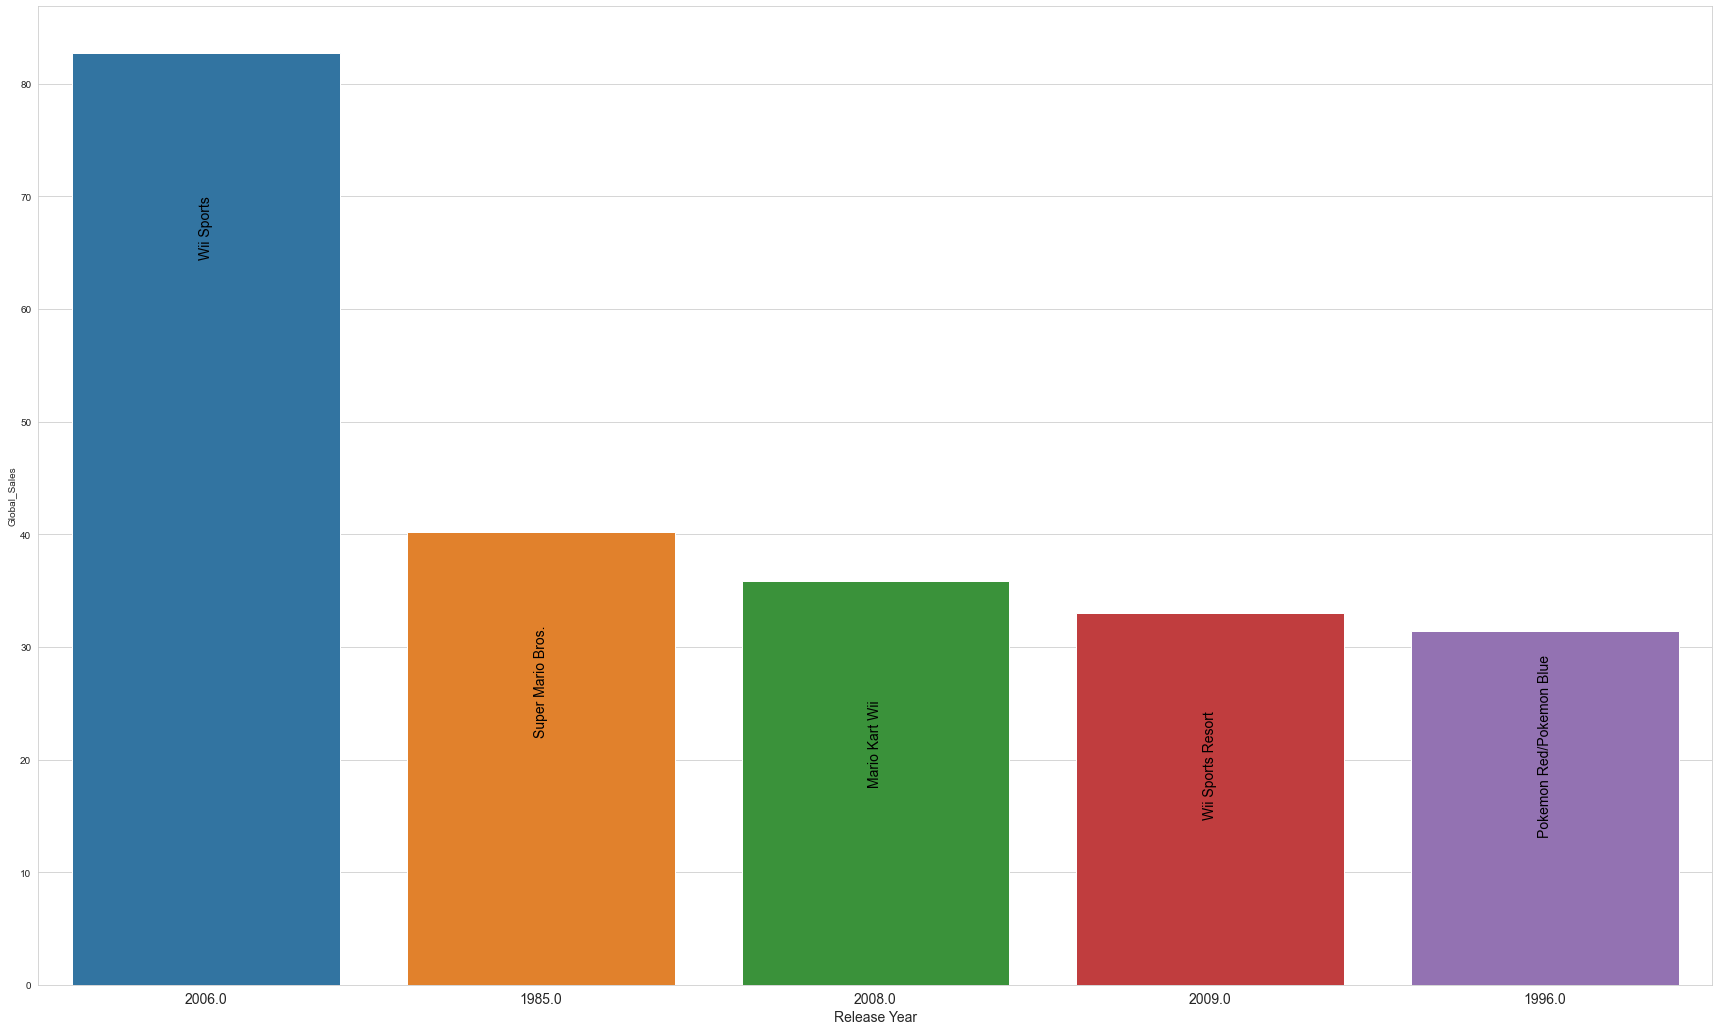

In [27]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale)
index = 0
for value in top_game_sale['Global_Sales']:
    g.text(index, value - 18, name[index], color='#000', size=14, rotation= 90, ha="center")
    index += 1
plt.xticks(np.arange(0, 5), top_game_sale['Year'], fontsize=14)
plt.xlabel('Release Year', fontsize= 14)
plt.show()

### 答案：拥有最高销售额的是2006年发行的Wii Sports

# 10. 根据类别在各个地区进行销售额比较

In [37]:
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_map = comp_genre.groupby(by=['Genre']).sum()

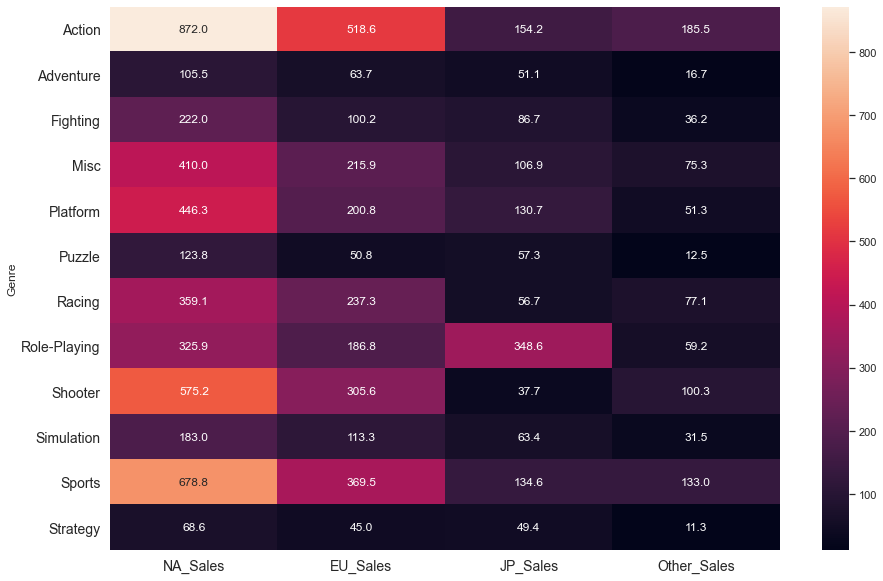

In [45]:
plt.figure(figsize=(15, 10))
#自动将DF中的index/column信息转化成热力图中的Y/X，annot显示数值
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [65]:
#加index将Genre变成一列
comp_table = comp_map.reset_index()
#根据Genre将多列合并成两列var_name列,value_name数值 为了分成不同地区的价格拆分原DF
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,871.96
1,Adventure,NA_Sales,105.46
2,Fighting,NA_Sales,221.99
3,Misc,NA_Sales,410.02
4,Platform,NA_Sales,446.26


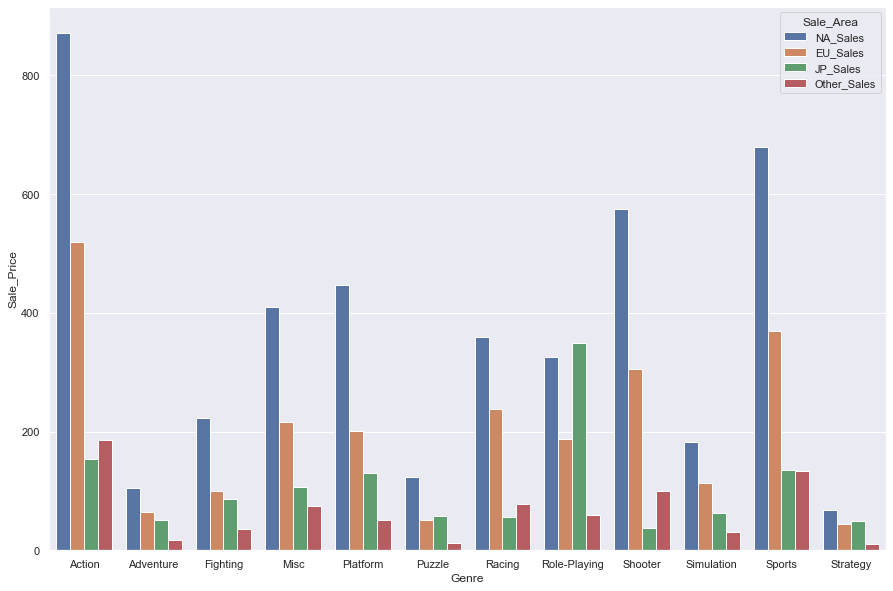

In [67]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)

# 11. 平台间的销售额比较

In [68]:
comp_platform = data[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_platform.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii,41.49,29.02,3.77,8.46
1,NES,29.08,3.58,6.81,0.77
2,Wii,15.85,12.88,3.79,3.31
3,Wii,15.75,11.01,3.28,2.96
4,GB,11.27,8.89,10.22,1.00


In [74]:
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()
comp_platform.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,2600,90.60,5.47,0.00,0.91
1,3DO,0.00,0.00,0.10,0.00
2,3DS,78.04,57.95,92.32,12.51
3,DC,5.43,1.69,8.56,0.27
4,DS,390.44,194.65,175.57,60.51


In [75]:
comp_table = pd.melt(comp_platform, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Platform,Sale_Area,Sale_Price
0,2600,NA_Sales,90.60
1,3DO,NA_Sales,0.00
2,3DS,NA_Sales,78.04
3,DC,NA_Sales,5.43
4,DS,NA_Sales,390.44


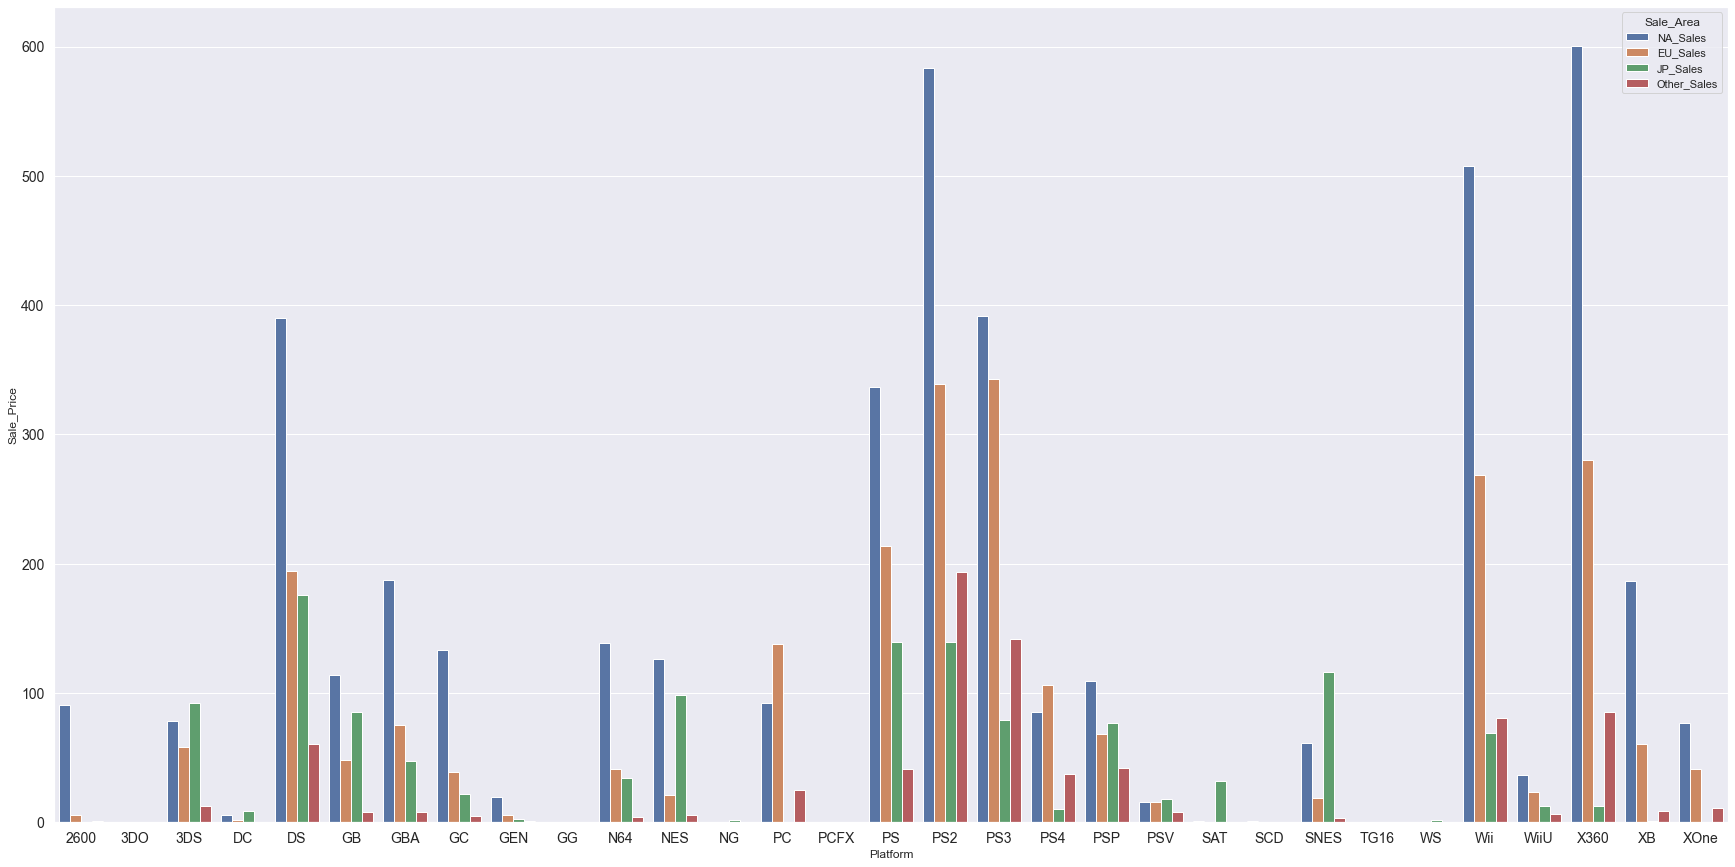

In [90]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# 12. 前20发行商

In [80]:
#只取Year count结果为Series
top_publisher = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

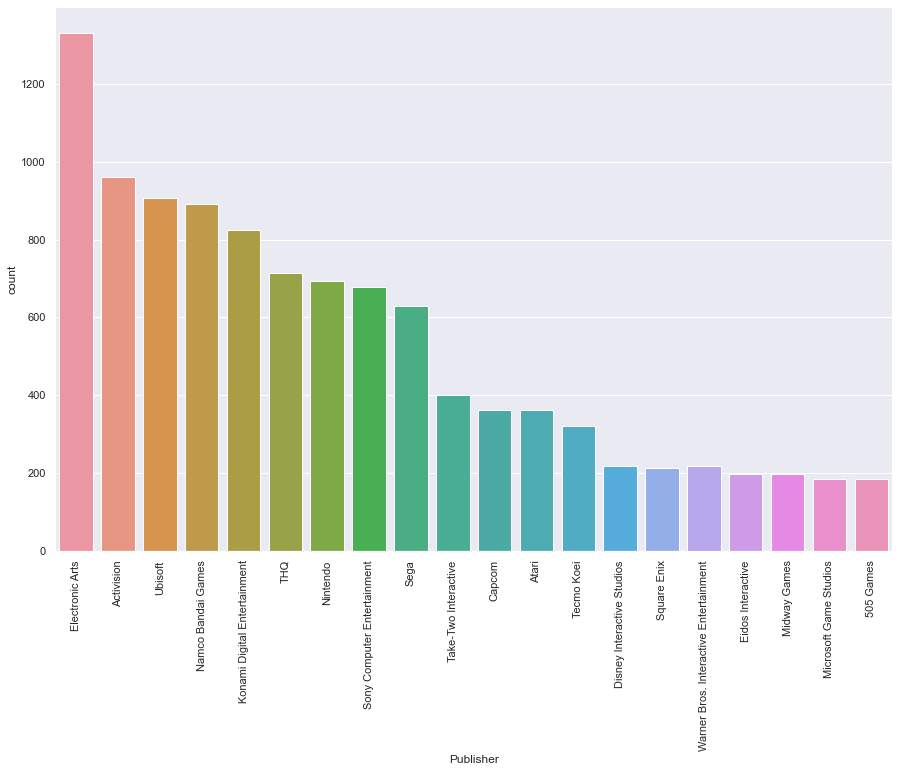

In [86]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=data, order = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)

# 13. 全球销量前20的发行商

In [88]:
sale_pbl = data[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()
sale_pbl.head()

,Publisher,Global_Sales
0,Nintendo,1783.09
1,Electronic Arts,1098.07
2,Activision,723.79
3,Sony Computer Entertainment,600.94
4,Ubisoft,464.67


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

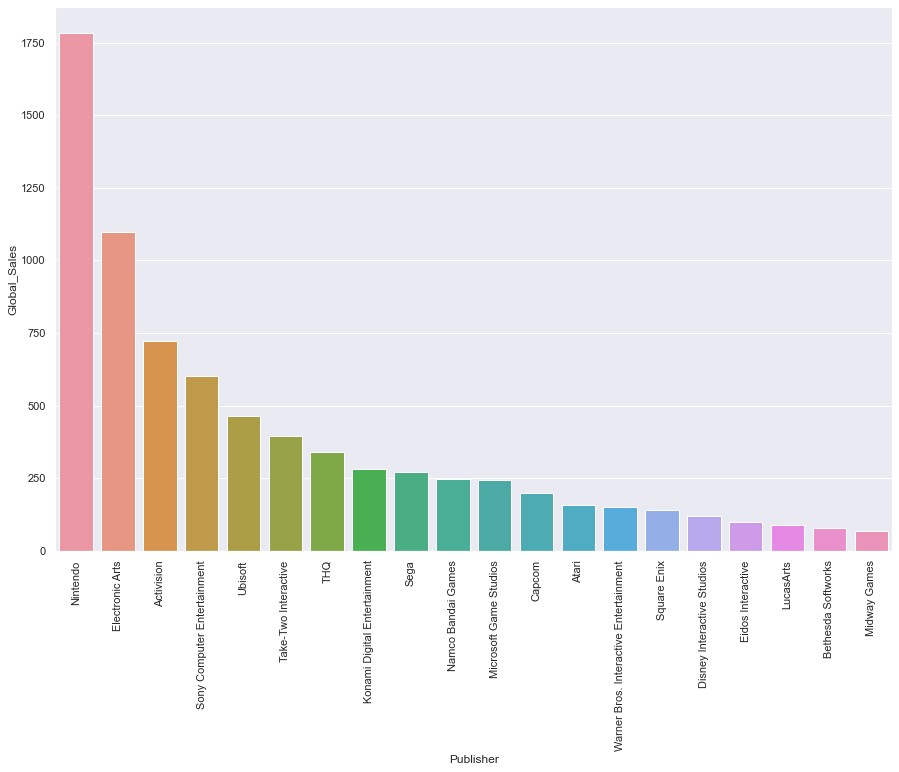

In [89]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.xticks(rotation=90)

# 14. 比较发行商在不同地区的销量

In [92]:
comp_publisher = data[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
comp_publisher.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Nintendo,11.27,8.89,10.22,1.00,31.37


In [95]:
comp_publisher = comp_publisher.groupby(by=['Publisher']).sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
comp_publisher = comp_publisher.head(20)
comp_publisher.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
12,Nintendo,815.71,417.81,454.25,95.13,1783.09
6,Electronic Arts,591.43,364.36,13.95,128.14,1098.07
0,Activision,428.03,214.14,6.40,74.90,723.79
14,Sony Computer Entertainment,262.79,184.85,73.88,79.40,600.94
18,Ubisoft,249.31,158.94,7.26,48.96,464.67


In [115]:
comp_publisher = pd.melt(comp_publisher, id_vars=['Publisher'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_publisher

,Publisher,Sale_Area,Sale_Price
0,Nintendo,NA_Sales,815.71
1,Electronic Arts,NA_Sales,591.43
2,Activision,NA_Sales,428.03
3,Sony Computer Entertainment,NA_Sales,262.79
4,Ubisoft,NA_Sales,249.31
...,...,...,...
75,Disney Interactive Studios,Other_Sales,13.18
76,Eidos Interactive,Other_Sales,8.02
77,LucasArts,Other_Sales,10.50
78,Bethesda Softworks,Other_Sales,9.87


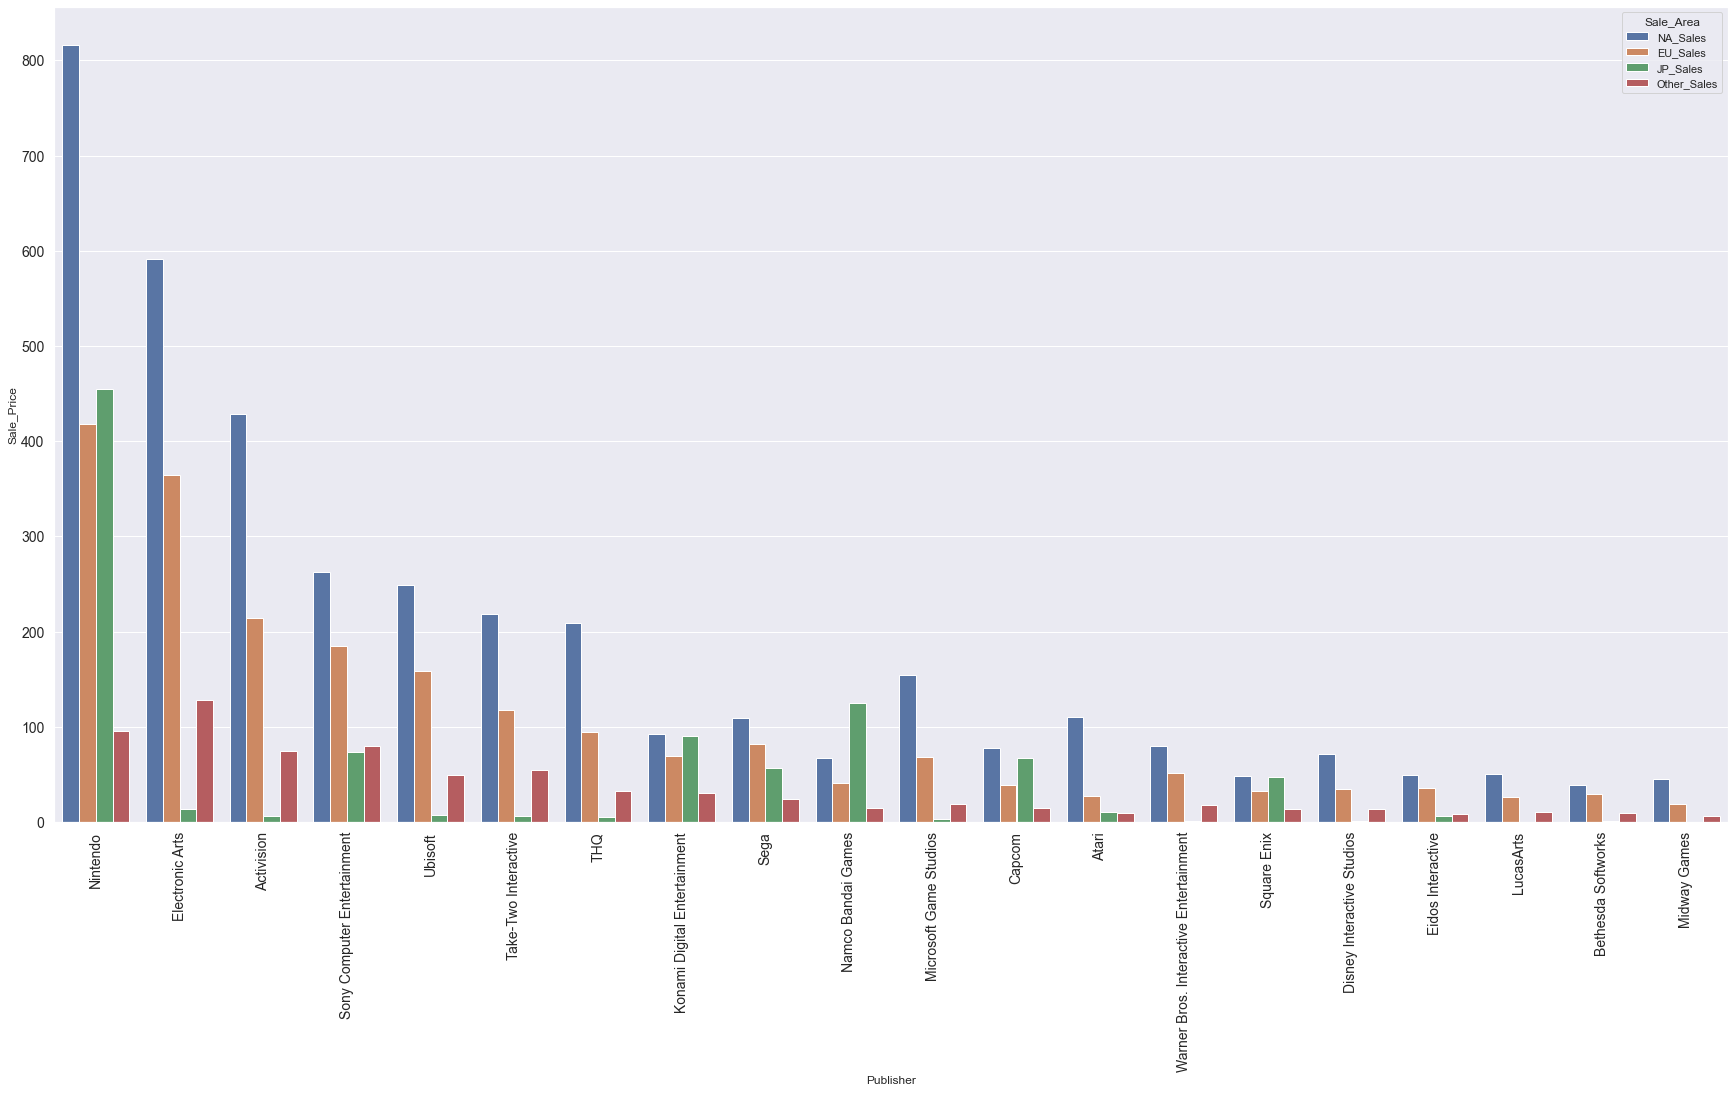

In [116]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Publisher', y='Sale_Price', hue='Sale_Area', data=comp_publisher)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

# 15. 每年发行数量最多的发行商

In [174]:
top_publisher =  data[['Year', 'Publisher']]
#每年发行商发行游戏数量
top_publisher_df = top_publisher.groupby(by=['Year', 'Publisher']).size().reset_index(name='Count')
top_publisher_idx =  top_publisher_df.groupby(by=['Year'])['Count'].transform(max) == top_publisher_df['Count']
top_publisher_count = top_publisher_df[top_publisher_idx].reset_index(drop=True)
top_publisher_count = top_publisher_count.drop_duplicates(subset=["Year", "Count"], keep='last').reset_index(drop = True)
top_publisher_count

,Year,Publisher,Count
0,1980.0,Activision,5
1,1981.0,Atari,11
2,1982.0,Atari,14
3,1983.0,Nintendo,6
4,1984.0,Nintendo,9
5,1985.0,Nintendo,7
6,1986.0,Nintendo,6
7,1987.0,Nintendo,4
8,1988.0,Nintendo,6
9,1989.0,Nintendo,9


In [176]:
publisher= top_publisher_count['Publisher']

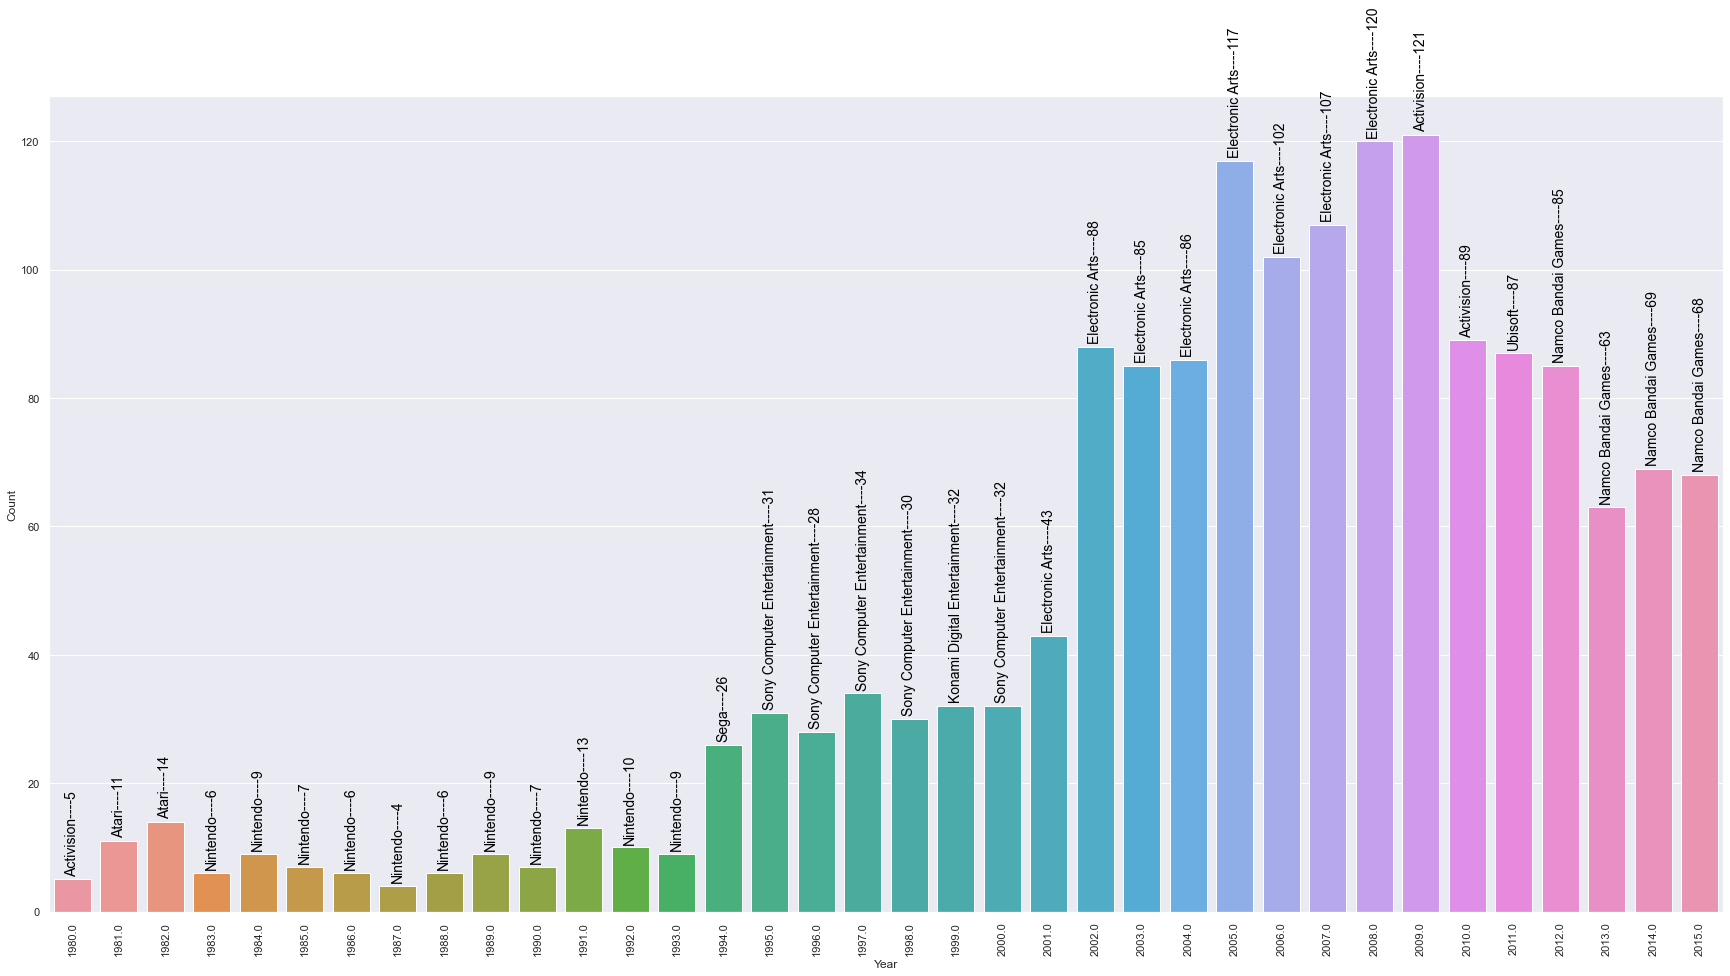

In [177]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='Count', data=top_publisher_count)
index = 0
for value in top_publisher_count['Count'].values:
    g.text(index, value + 1, str(publisher[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

# 16. 不同地区的总收入

In [179]:
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,4370.02
1,EU_Sales,2407.37
2,JP_Sales,1277.27
3,Other_Sales,789.98


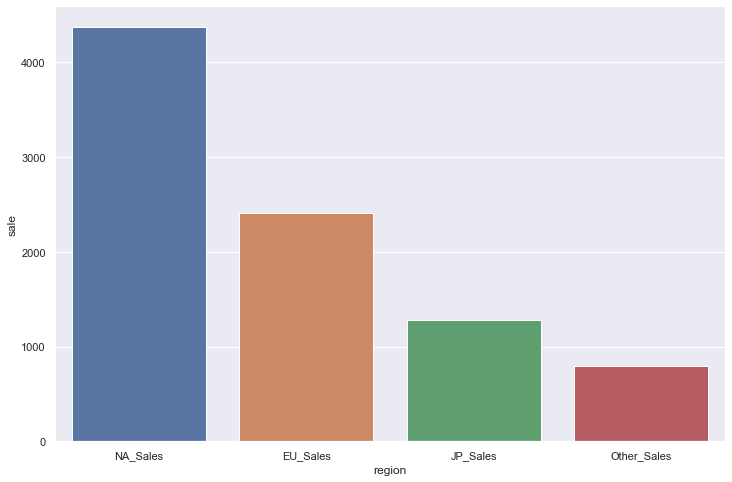

In [180]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg)

### 不同地区销售额饼状图

In [181]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']

([<matplotlib.patches.Wedge at 0x11cff71c0>,
 [Text(-1.0998101987078979, 0.020433472981709864, 'NA_Sales'),
  Text(0.8027109043560946, -0.7521005278736486, 'EU_Sales'),
  Text(0.9343594784564982, 0.5804932084172052, 'JP_Sales'),
  Text(0.3046246630563335, 1.0569786254498317, 'Other_Sales')],
 [Text(-0.5998964720224897, 0.011145530717296287, '49.4%'),
  Text(0.4378423114669606, -0.4102366515674446, '27.2%'),
  Text(0.5096506246126353, 0.31663265913665734, '14.4%'),
  Text(0.16615890712163645, 0.576533795699908, '8.9%')])

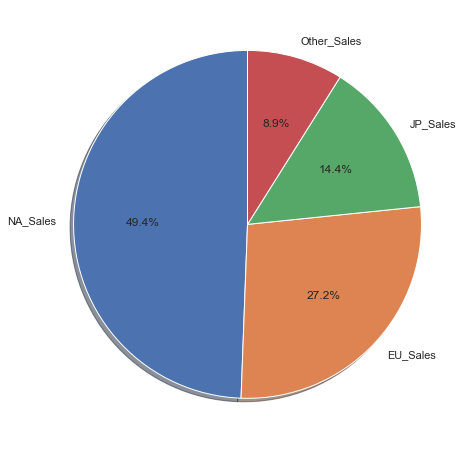

In [182]:
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

# 17. 销售额矩形图

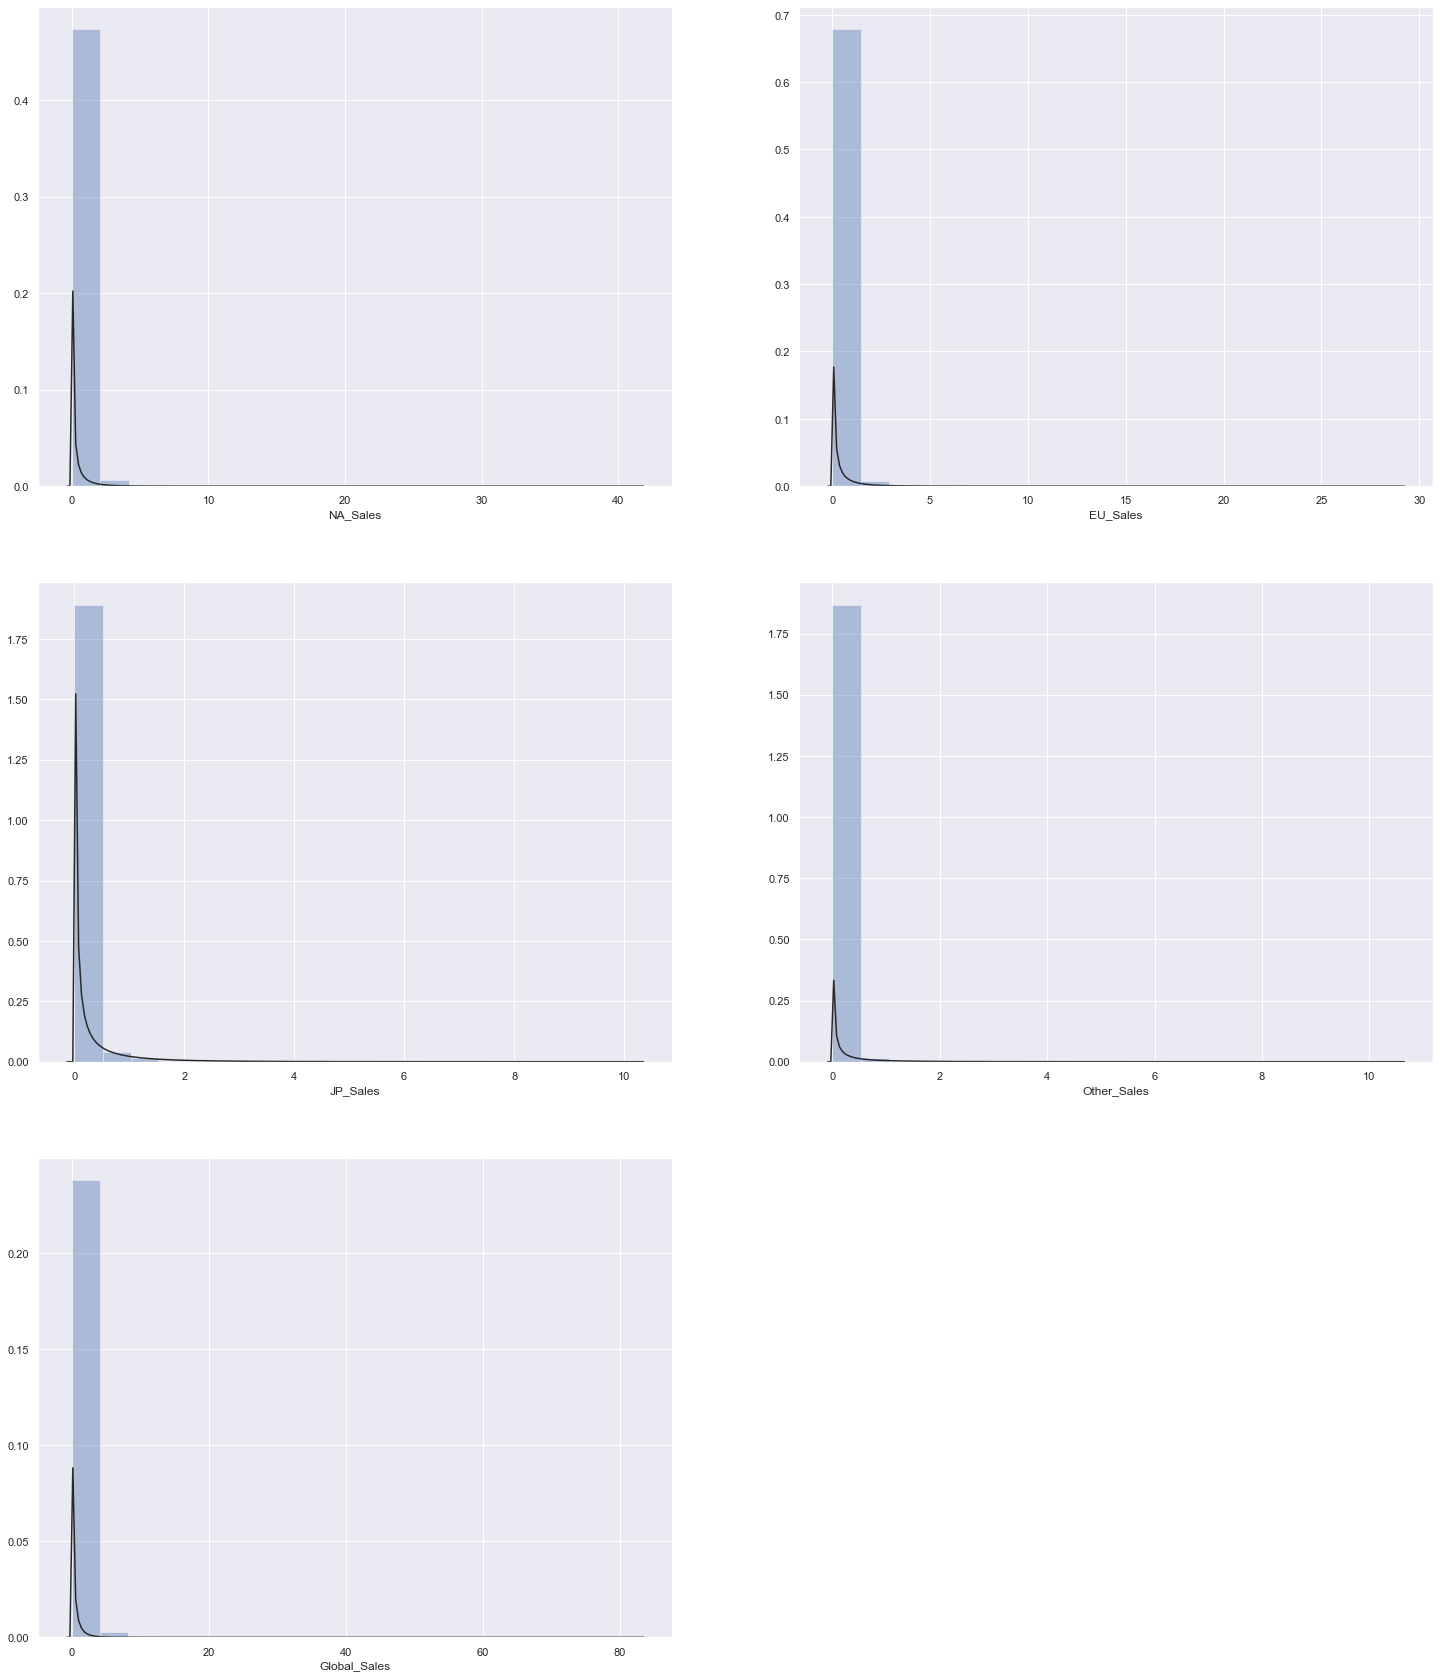

In [220]:
#sns.distplot(data['NA_Sales'],kde=False,fit=stats.gamma);
#sns.distplot(data['EU_Sales'],  kde=False, fit=stats.gamma);
plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(data[column], bins=20 ,kde=False, fit=stats.gamma)

## Distribution After log transformation

In [221]:
data_hist_log = data.copy()

In [223]:
data_hist_log = data_hist_log[data_hist_log.NA_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.EU_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Other_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.JP_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Global_Sales != 0]

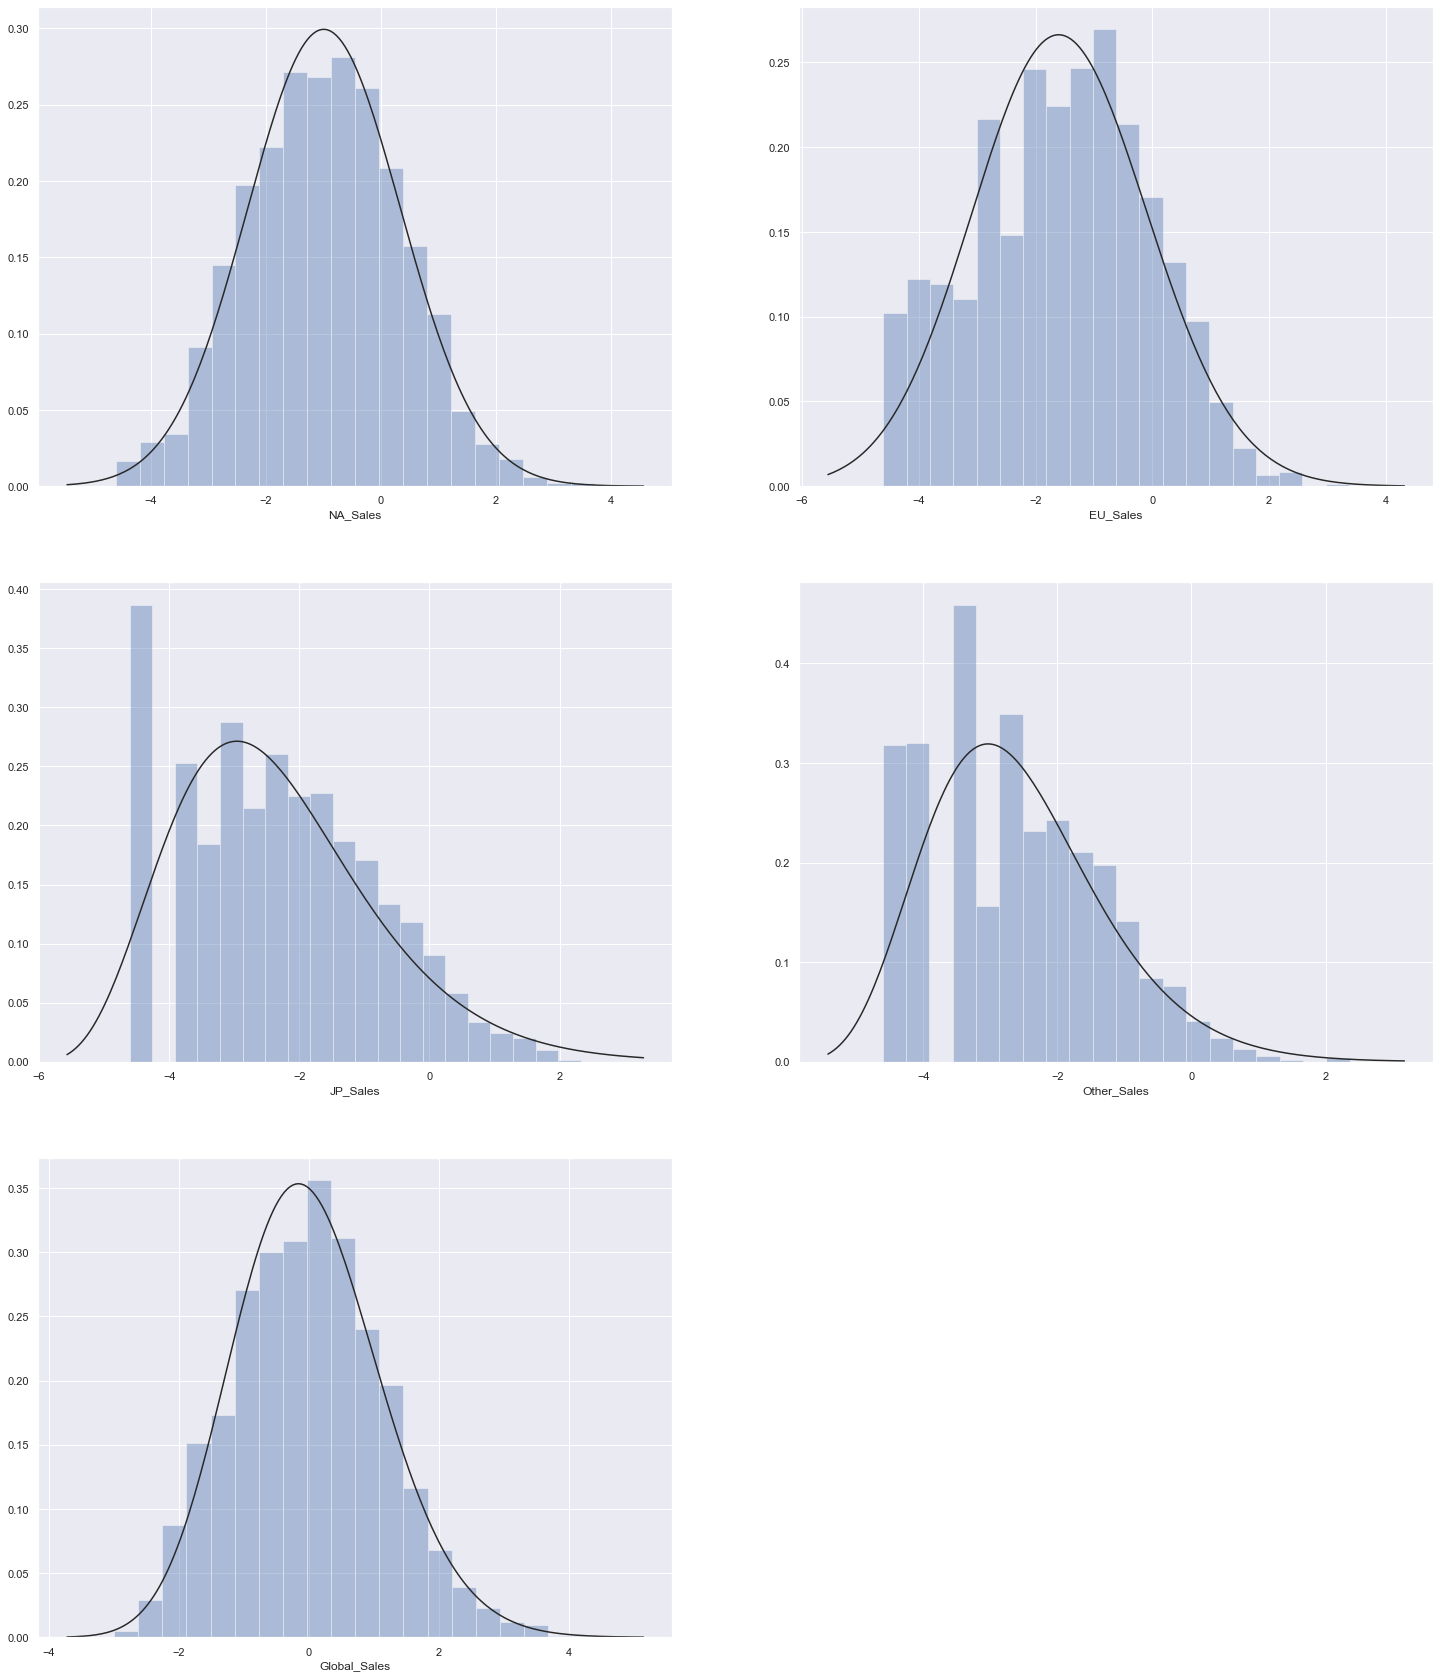

In [224]:
plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(np.log(data_hist_log[column]), bins=20, kde=False, fit=stats.gamma)

# 18. 列之间的关系

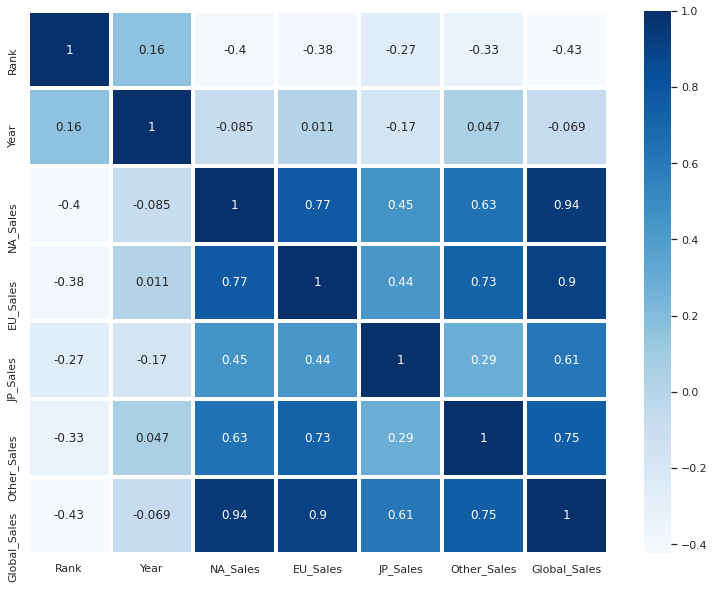

In [56]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(), cmap = "Blues", annot=True, linewidth=3)

**我们可以说NA_Sales和EU_sales在Global_Sales中有很大的作用。 NA_Sales和EU_sales大多是相关的**

## 散点图矩阵

In [57]:
data_pair = data.loc[:,["Year","Platform", "Genre", "NA_Sales","EU_Sales", "Other_Sales"]]
data_pair

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006.0,Wii,Sports,41.49,29.02,8.46
1,1985.0,NES,Platform,29.08,3.58,0.77
2,2008.0,Wii,Racing,15.85,12.88,3.31
3,2009.0,Wii,Sports,15.75,11.01,2.96
4,1996.0,GB,Role-Playing,11.27,8.89,1.00
...,...,...,...,...,...,...
16593,2002.0,GBA,Platform,0.01,0.00,0.00
16594,2003.0,GC,Shooter,0.01,0.00,0.00
16595,2008.0,PS2,Racing,0.00,0.00,0.00
16596,2010.0,DS,Puzzle,0.00,0.01,0.00


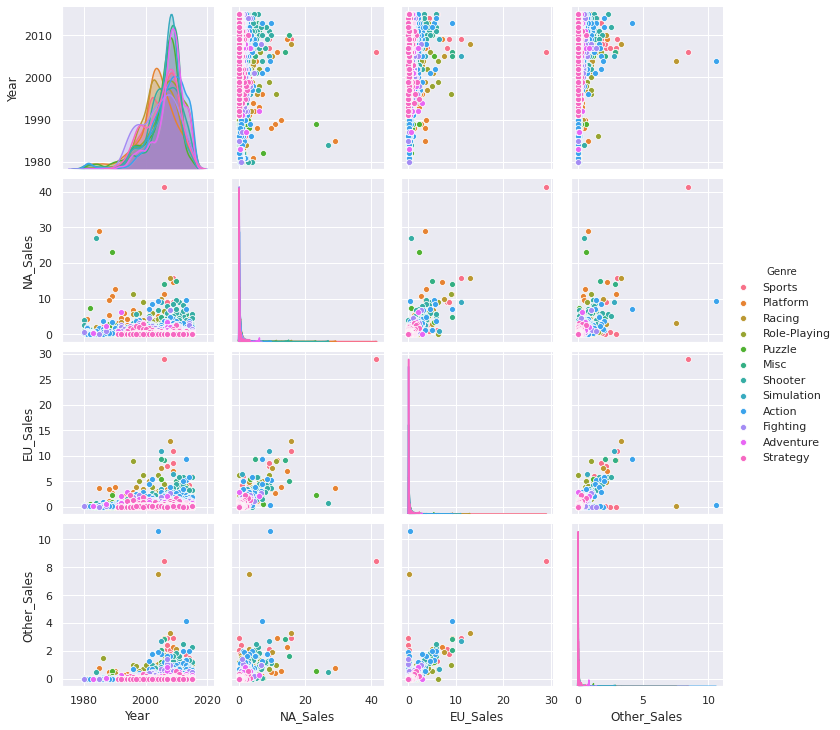

In [58]:
sns.pairplot(data_pair, hue='Genre')

# log work

In [59]:
data_pair_log = data_pair.copy()

In [60]:
sale_columns = ['NA_Sales', 'EU_Sales', 'Other_Sales']

In [61]:
# for column in sale_columns:
#     if 0 in data[column].unique():
#         pass
#     else:
#         data_pair_log[column] = np.log(data_pair_log[column])
# #         data_pair_log.head()

In [62]:
data_pair_log = data_pair_log[data_pair_log.NA_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.EU_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.Other_Sales != 0]

In [63]:
data_pair_log

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006.0,Wii,Sports,41.49,29.02,8.46
1,1985.0,NES,Platform,29.08,3.58,0.77
2,2008.0,Wii,Racing,15.85,12.88,3.31
3,2009.0,Wii,Sports,15.75,11.01,2.96
4,1996.0,GB,Role-Playing,11.27,8.89,1.00
...,...,...,...,...,...,...
14071,1998.0,PC,Role-Playing,0.01,0.02,0.01
14183,2014.0,PS3,Racing,0.02,0.01,0.01
14185,2011.0,PC,Puzzle,0.01,0.02,0.01
14267,2007.0,PC,Puzzle,0.01,0.02,0.01


In [64]:
data_pair_log['NA_Sales'] = np.log(data_pair_log['NA_Sales']);
data_pair_log['EU_Sales'] = np.log(data_pair_log['EU_Sales']);
data_pair_log['Other_Sales'] = np.log(data_pair_log['Other_Sales']);

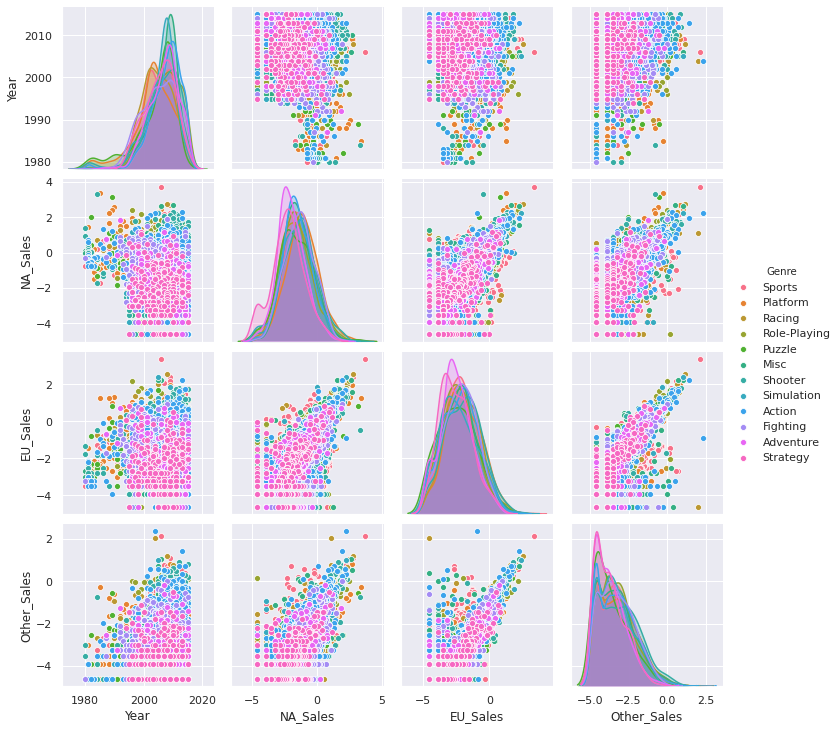

In [65]:
# sns.pairplot(data_pair_log, hue='Genre',  diag_kind = 'kde',
#              plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
#              size = 4)

sns.pairplot(data_pair_log, hue='Genre',  palette="husl")